In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.026034355718, cross=0.152769905205
3600: Fitting... Scoring... Calc.err... train=0.0249036102153, cross=0.145845237502
10800: Fitting... Scoring... Calc.err... train=0.0207700049376, cross=0.121795927268
21600: Fitting... Scoring... Calc.err... train=0.0179660064287, cross=0.109232644551
43200: Fitting... Scoring... Calc.err... train=0.0178241, cross=0.1041914
86400: Fitting... Scoring... Calc.err... train=0.01867634, cross=0.11059472


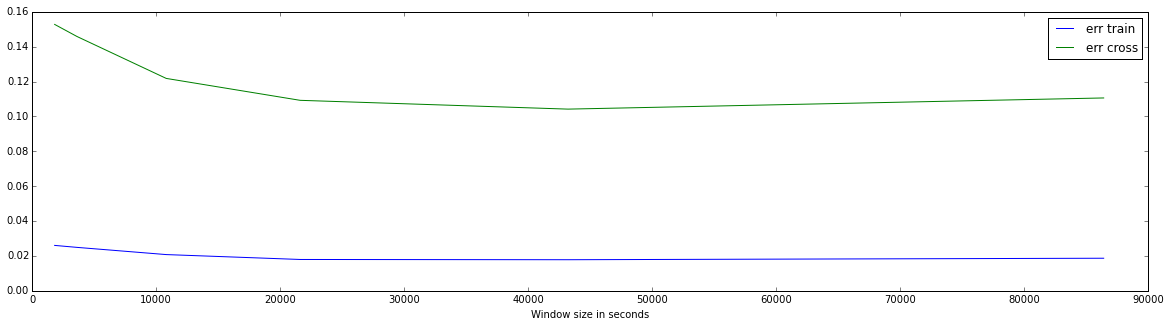

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0181676, cross=0.10416896
3: Fitting... Scoring... Calc.err... train=0.01776321, cross=0.10391064
4: Fitting... Scoring... Calc.err... train=0.01805194, cross=0.10422624
5: Fitting... Scoring... Calc.err... train=0.01809967, cross=0.10482878
6: Fitting... Scoring... Calc.err... train=0.01786812, cross=0.10416502
7: Fitting... Scoring... Calc.err... train=0.01808086, cross=0.10373488
8: Fitting... Scoring... Calc.err... train=0.01799723, cross=0.10419208
9: Fitting... Scoring... Calc.err... train=0.01802721, cross=0.10469768


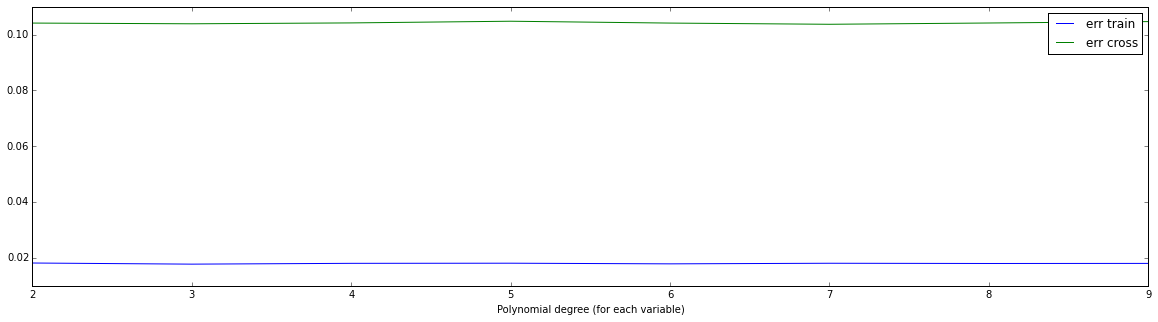

Evaluation using Alex' data:


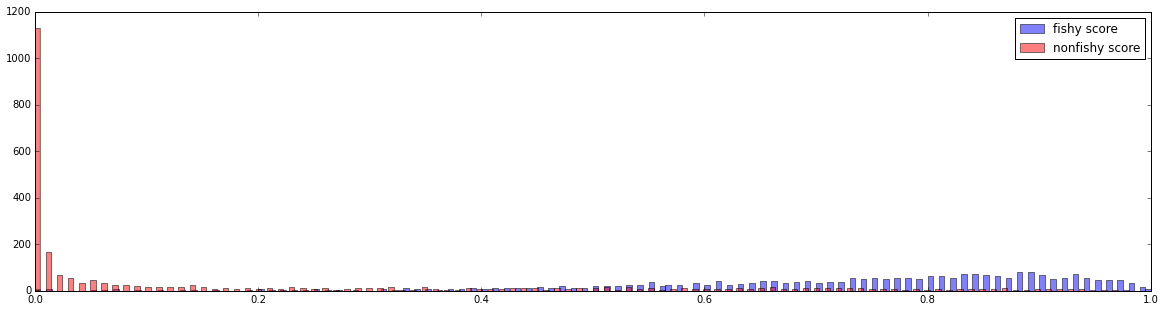

Squared numerical error: 0.10115478
Error (overlap): 9.76%
False positives given cutoff at 0.5: 0.974147620832%


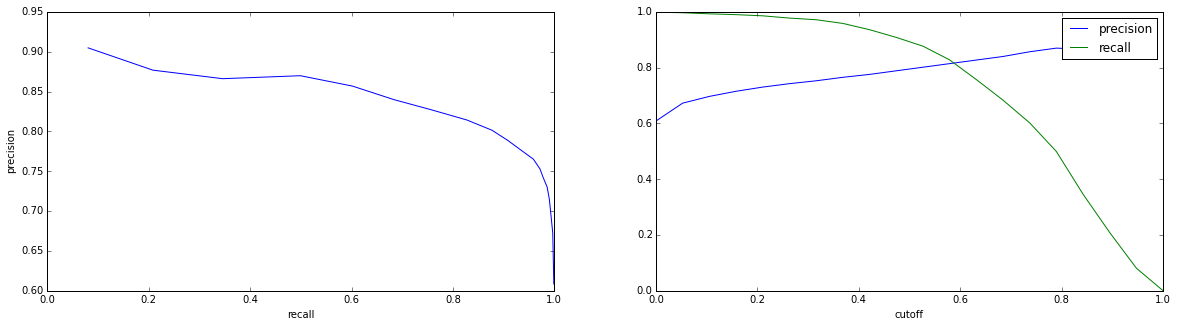

Score window: 43200
Evaluate using Kristinas data:


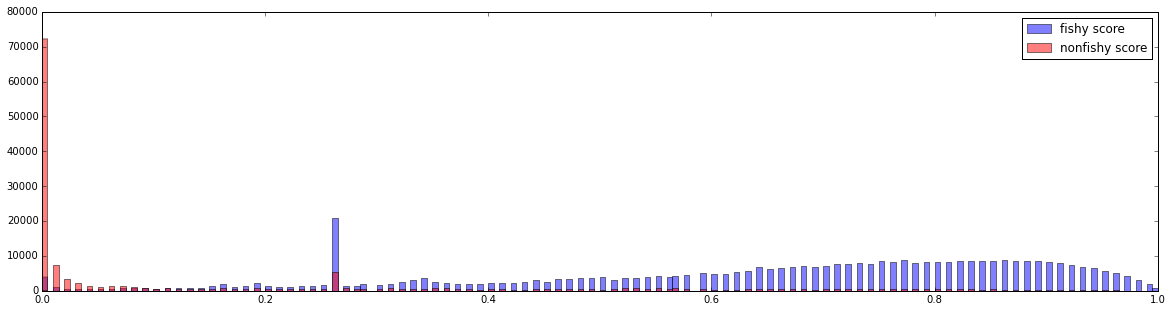

Squared numerical error: 0.159480342193
Error (overlap): 19.6732595381%
False positives given cutoff at 0.5: 11.8324252064%


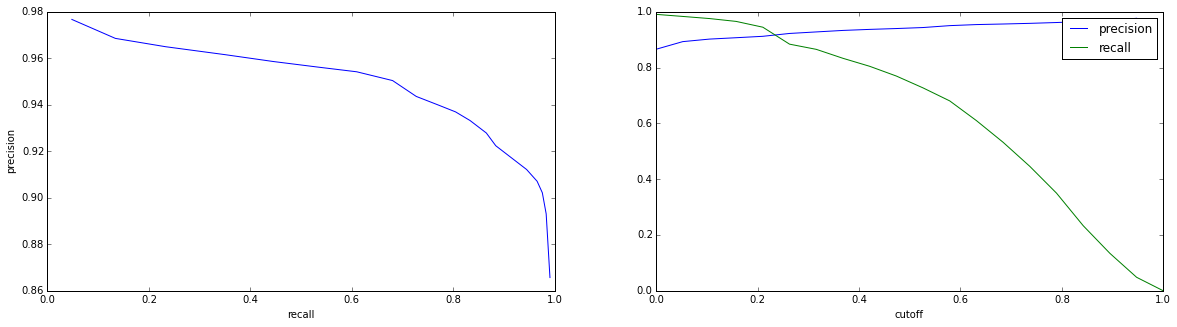

Score window: 43200


In [2]:
x, xtrain, xcross, xtest = load_dataset('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0311079147715, cross=0.131313697564
3600: Fitting... Scoring... Calc.err... train=0.0269270964646, cross=0.123575481069
10800: Fitting... Scoring... Calc.err... train=0.0180470323161, cross=0.102966993216
21600: Fitting... Scoring... Calc.err... train=0.0157069659243, cross=0.0975565091254
43200: Fitting... Scoring... Calc.err... train=0.0122781, cross=0.0871127
86400: Fitting... Scoring... Calc.err... train=0.01199892, cross=0.08419102


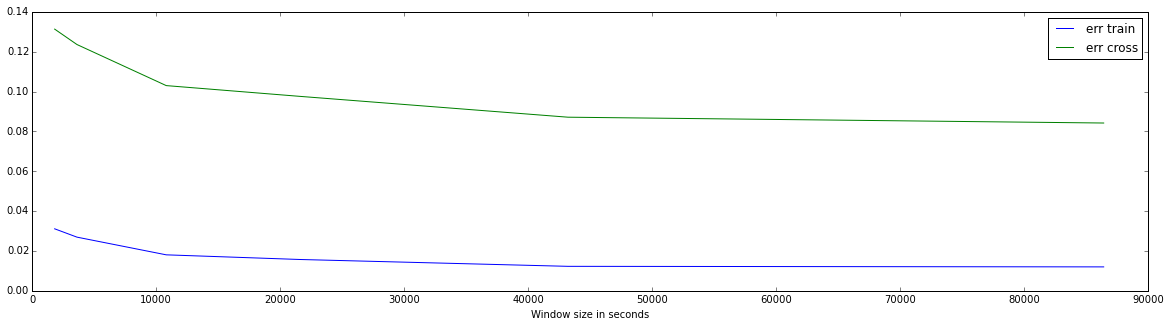

Best window size: 86400
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.01179804, cross=0.0845935
3: Fitting... Scoring... Calc.err... train=0.01181765, cross=0.08436226
4: Fitting... Scoring... Calc.err... train=0.01184387, cross=0.0845304
5: Fitting... Scoring... Calc.err... train=0.01185575, cross=0.0846174
6: Fitting... Scoring... Calc.err... train=0.01201322, cross=0.08411298
7: Fitting... Scoring... Calc.err... train=0.01159284, cross=0.08445346
8: Fitting... Scoring... Calc.err... train=0.0117954, cross=0.08425308
9: Fitting... Scoring... Calc.err... train=0.01183047, cross=0.0846744


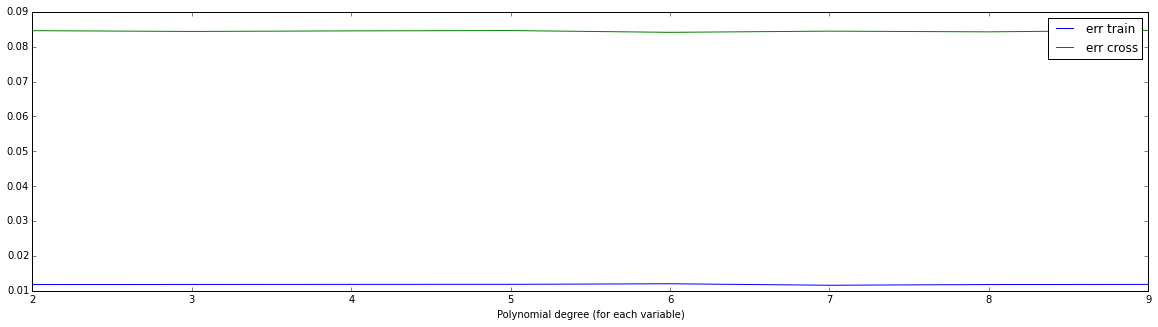

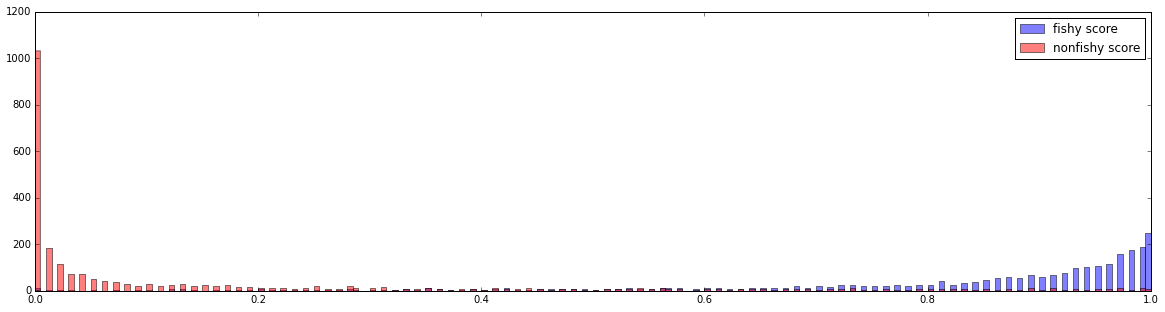

Squared numerical error: 0.08303262
Error (overlap): 21.88%
False positives given cutoff at 0.5: 25.619519634%


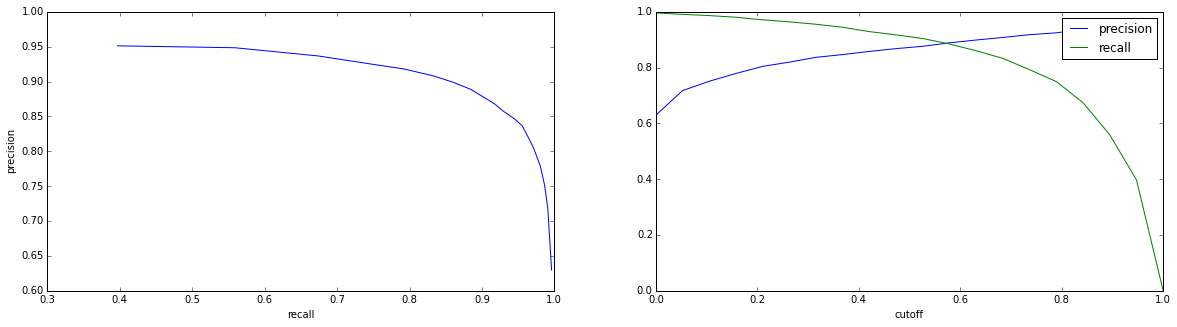

Score window: 86400


In [3]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

In [4]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0327264432033, cross=0.130932198058
3600: Fitting... Scoring... Calc.err... train=0.0283118333121, cross=0.12551479466
10800: Fitting... Scoring... Calc.err... train=0.0176624067085, cross=0.107671147326
21600: Fitting... Scoring... Calc.err... train=0.0151126385918, cross=0.10064307191
43200: Fitting... Scoring... Calc.err... train=0.01194911, cross=0.08561558
86400: Fitting... Scoring... Calc.err... train=0.01228559, cross=0.090271


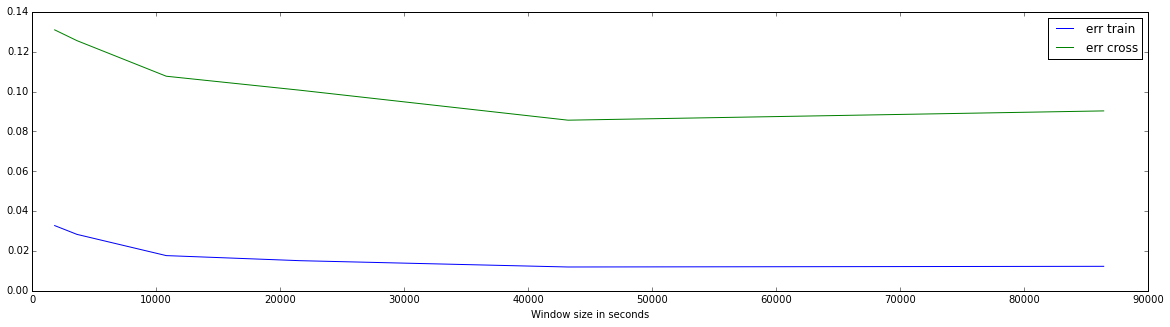

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.01208199, cross=0.08572518
3: Fitting... Scoring... Calc.err... train=0.01210399, cross=0.0858823
4: Fitting... Scoring... Calc.err... train=0.01205573, cross=0.08536872
5: Fitting... Scoring... Calc.err... train=0.01203179, cross=0.08582978
6: Fitting... Scoring... Calc.err... train=0.01207821, cross=0.0857637
7: Fitting... Scoring... Calc.err... train=0.01228504, cross=0.08548466
8: Fitting... Scoring... Calc.err... train=0.0120956, cross=0.08551698
9: Fitting... Scoring... Calc.err... train=0.01204625, cross=0.08575532


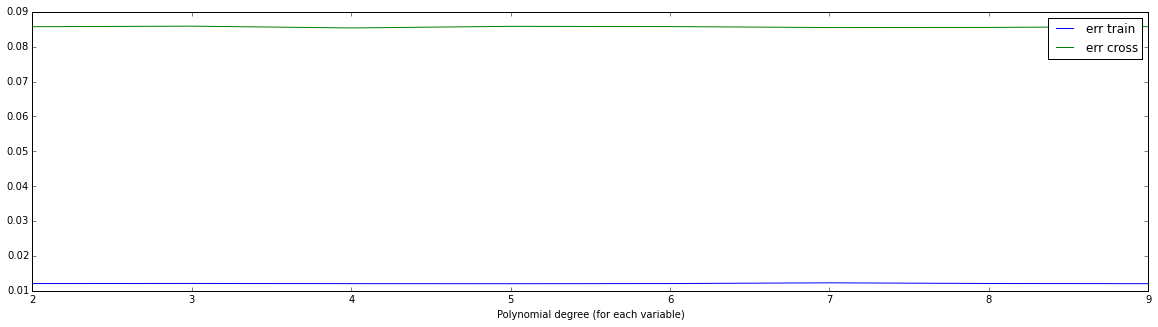

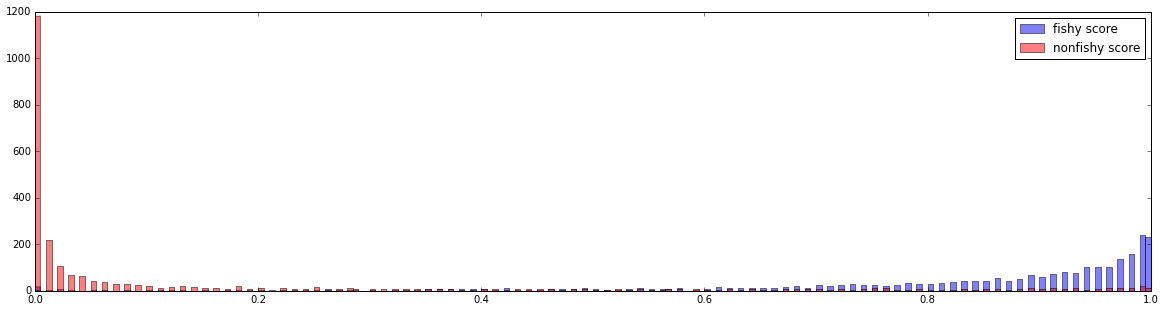

Squared numerical error: 0.08767348
Error (overlap): 21.32%
False positives given cutoff at 0.5: 26.5904761905%


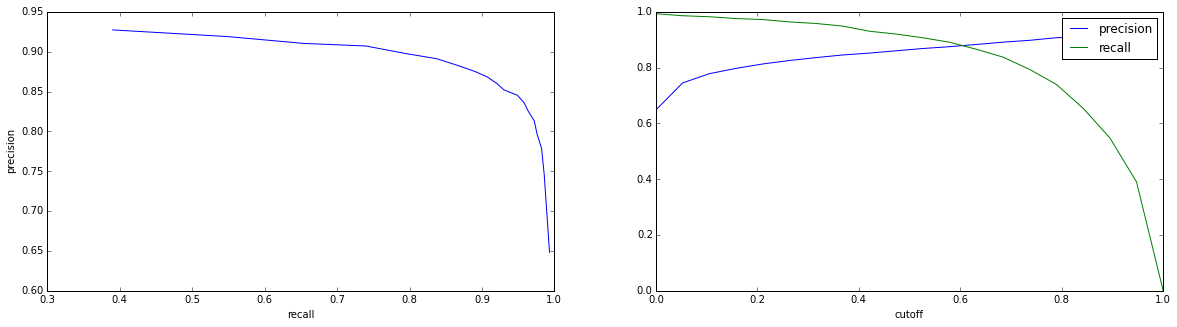

Score window: 43200


In [5]:
import imp, scoring
imp.reload(scoring)
from scoring import *
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

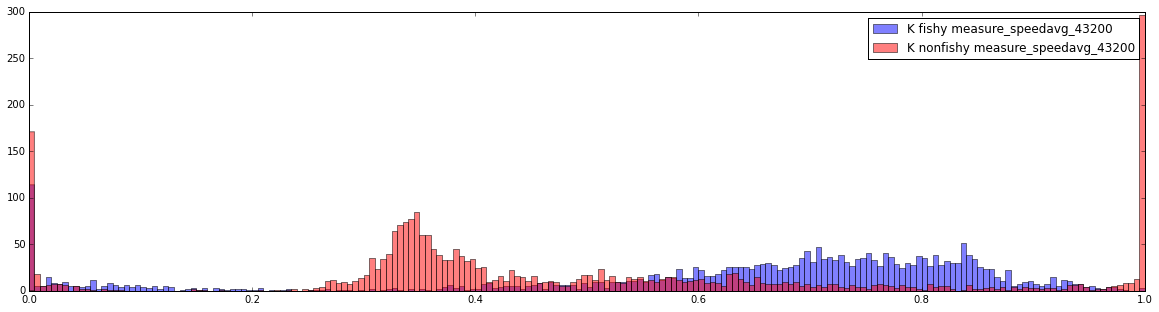

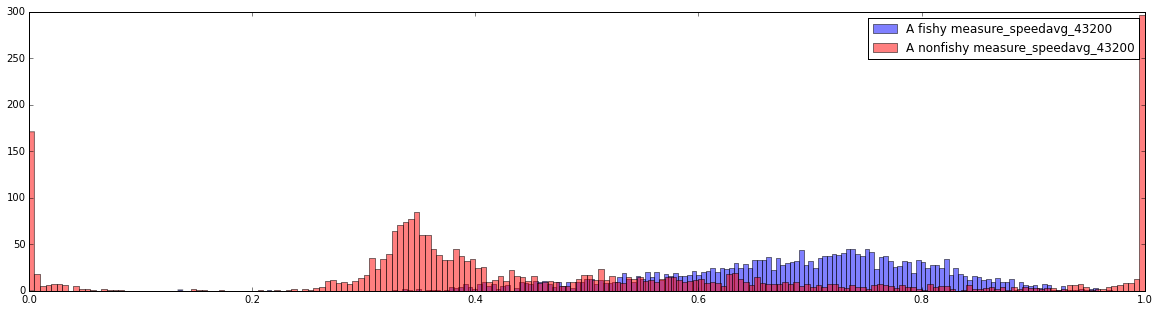

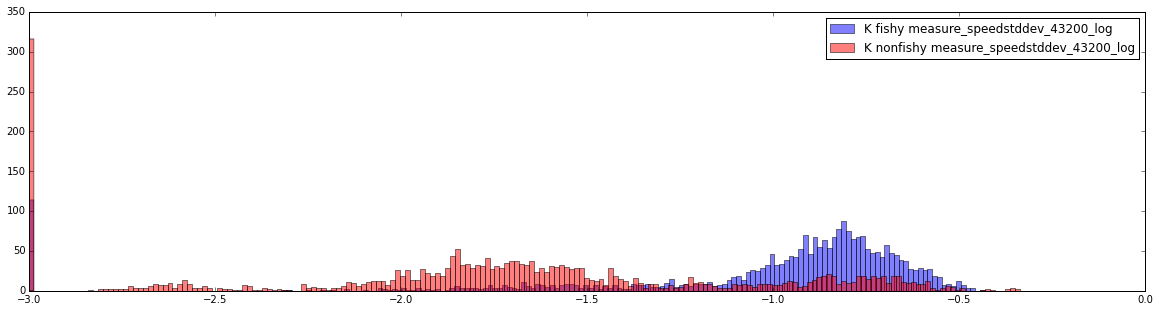

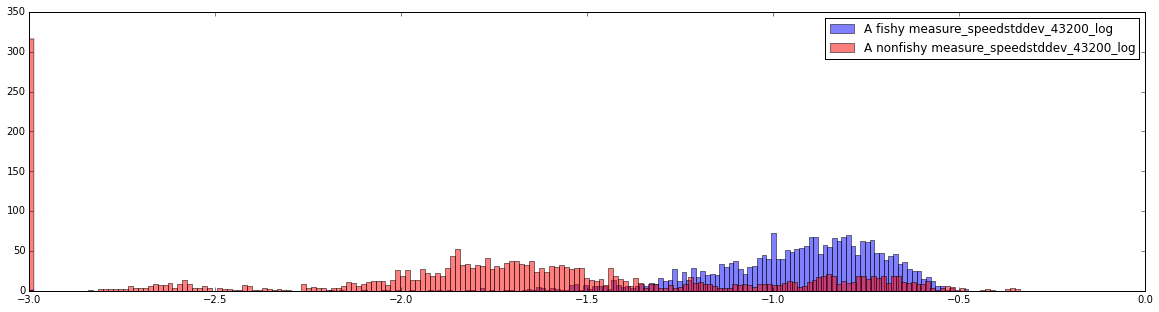

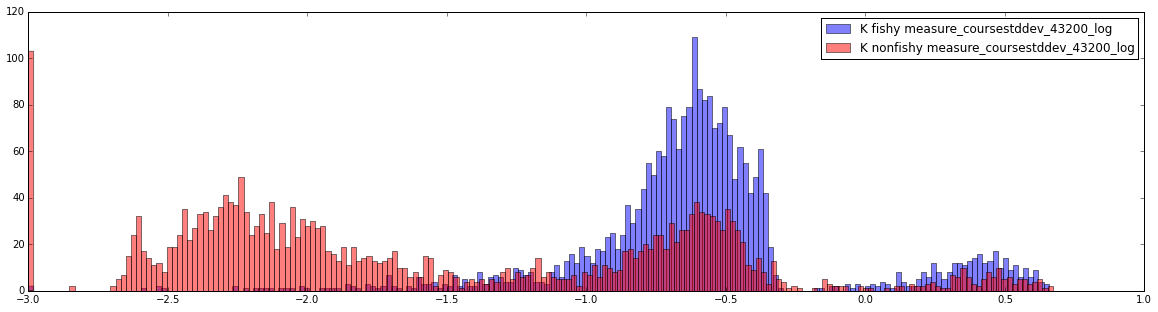

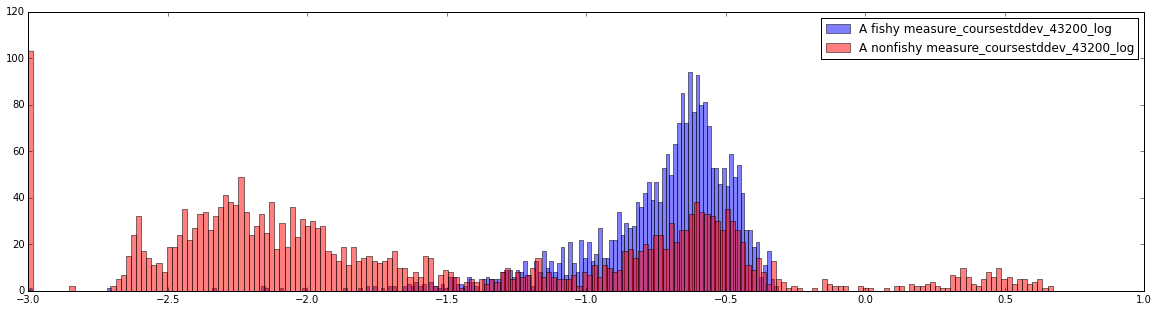

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_trawl.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0220052810182, cross=0.112202545941
3600: Fitting... Scoring... Calc.err... train=0.0194589926783, cross=0.108551844497
10800: Fitting... Scoring... Calc.err... train=0.0156685000154, cross=0.103002651882
21600: Fitting... Scoring... Calc.err... train=0.0151657167471, cross=0.106291478781
43200: Fitting... Scoring... Calc.err... train=0.0168898222722, cross=0.117857455
86400: Fitting... Scoring... Calc.err... train=0.0182225, cross=0.12979846


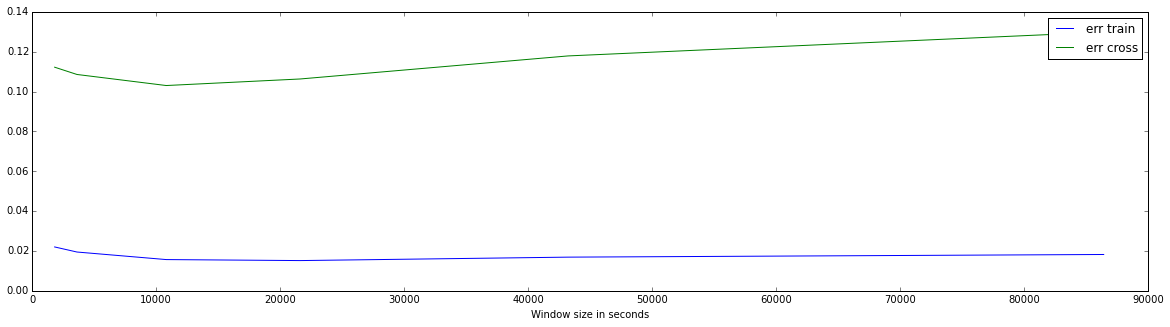

Best window size: 10800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0154556299596, cross=0.103520713194
3: Fitting... Scoring... Calc.err... train=0.0155752080077, cross=0.103252077763
4: Fitting... Scoring... Calc.err... train=0.0155263999312, cross=0.103606883425
5: Fitting... Scoring... Calc.err... train=0.0154957727411, cross=0.102684961655
6: Fitting... Scoring... Calc.err... train=0.0155100051167, cross=0.103481394122
7: Fitting... Scoring... Calc.err... train=0.0155046654794, cross=0.103315142692
8: Fitting... Scoring... Calc.err... train=0.0156040111855, cross=0.104097134176
9: Fitting... Scoring... Calc.err... train=0.0156296746939, cross=0.103322346161


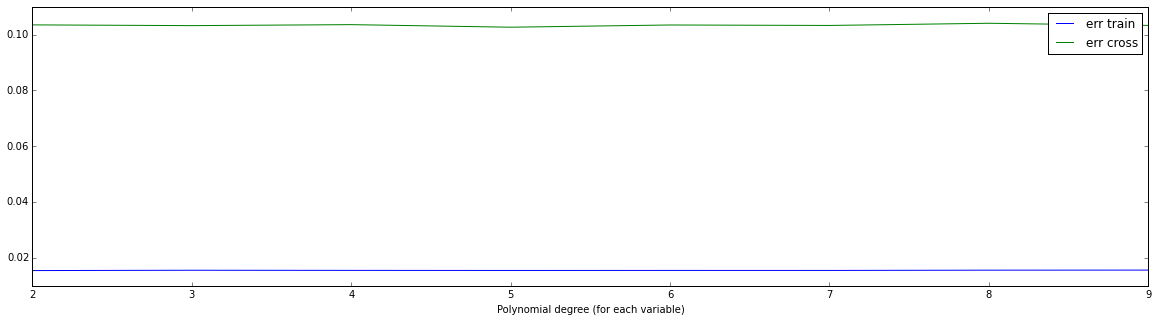

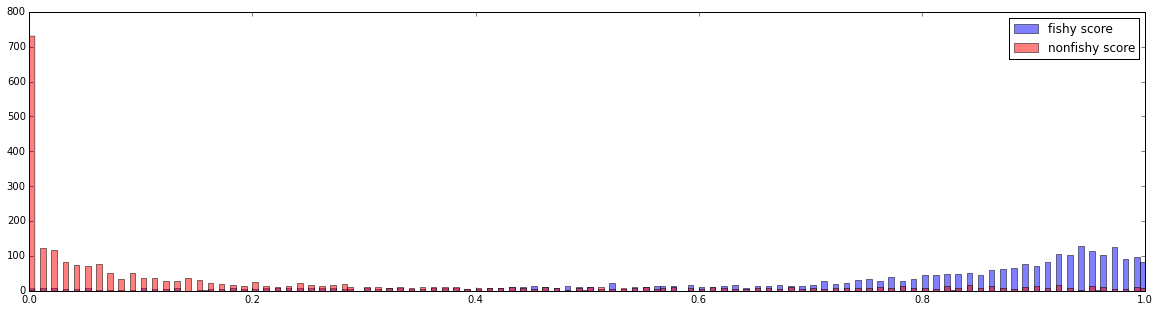

Squared numerical error: 0.112965011347
Error (overlap): 29.48%
False positives given cutoff at 0.5: 32.8517110266%


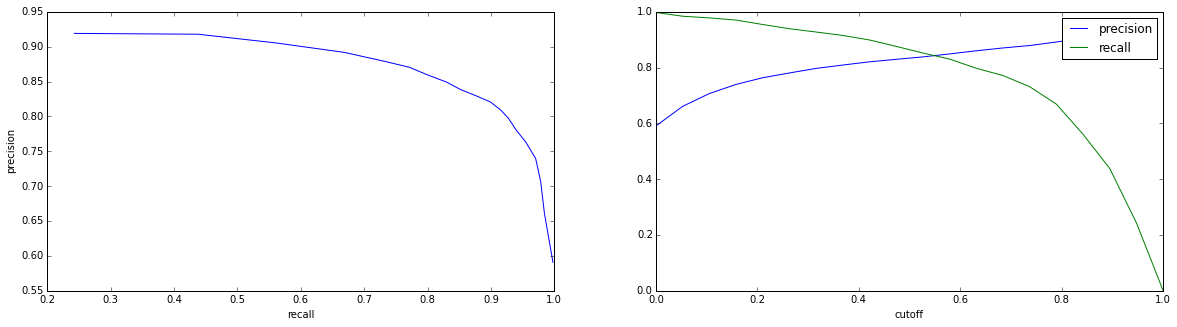

Score window: 10800


In [8]:
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 3, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 3, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

In [9]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_ps.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0182958757377, cross=0.0814244890601
3600: Fitting... Scoring... Calc.err... train=0.0163959650193, cross=0.0791439633533
10800: Fitting... Scoring... Calc.err... train=0.0133895787503, cross=0.0823391734409
21600: Fitting... Scoring... Calc.err... train=0.0131514839538, cross=0.0854275881531
43200: Fitting... Scoring... Calc.err... train=0.0141145613902, cross=0.0972450223815
86400: Fitting... Scoring... Calc.err... train=0.01315133, cross=0.0868625


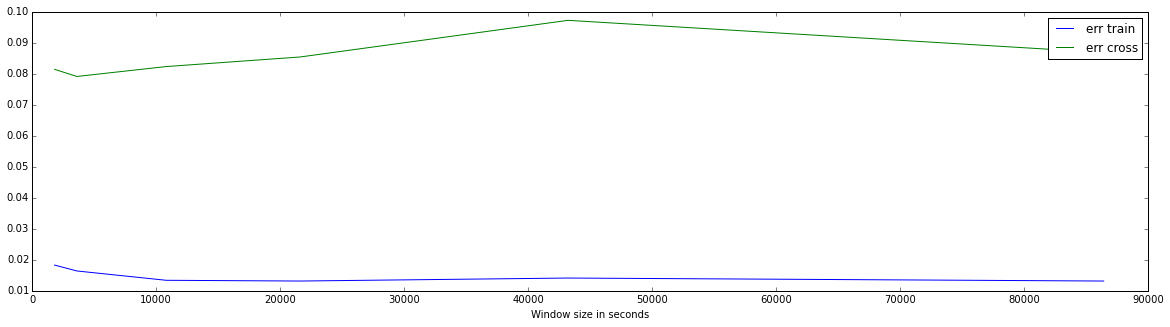

Best window size: 3600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.0164318428522, cross=0.0788311641669
3: Fitting... Scoring... Calc.err... train=0.0163843006788, cross=0.0787973819728
4: Fitting... Scoring... Calc.err... train=0.0163737412153, cross=0.0790454796783
5: Fitting... Scoring... Calc.err... train=0.0163147403496, cross=0.0791630170356
6: Fitting... Scoring... Calc.err... train=0.0164527513157, cross=0.0783256891497
7: Fitting... Scoring... Calc.err... train=0.016332660604, cross=0.0787206099043
8: Fitting... Scoring... Calc.err... train=0.0163038474472, cross=0.0786728826795
9: Fitting... Scoring... Calc.err... train=0.0163457810066, cross=0.0779349691443


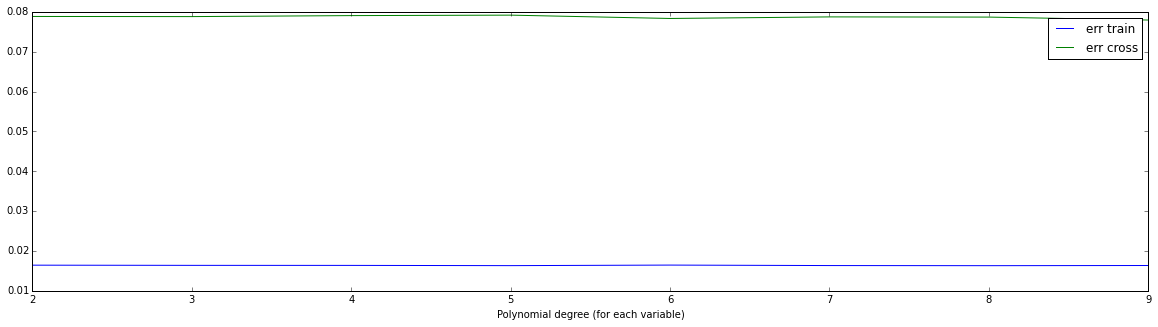

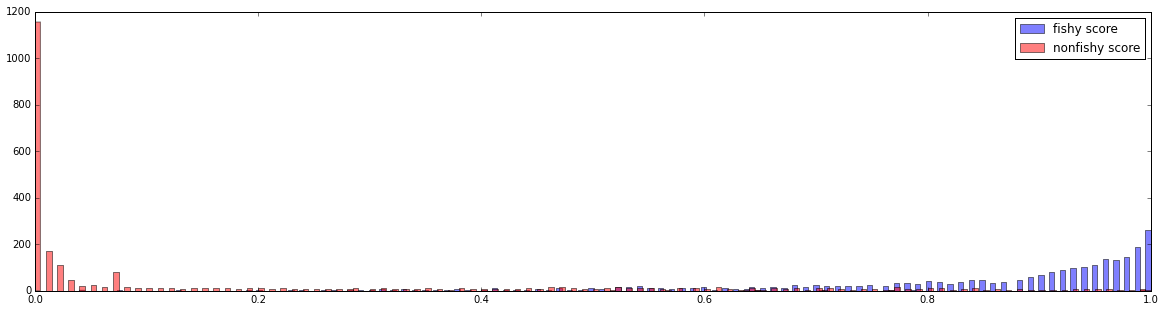

Squared numerical error: 0.0817033576705
Error (overlap): 11.84%
False positives given cutoff at 0.5: 16.5189649061%


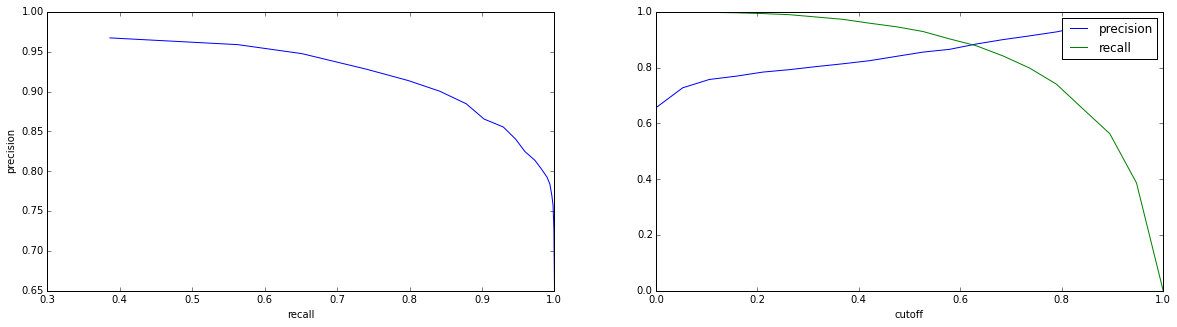

Score window: 3600


In [10]:
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 4, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 4, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())